Neste desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipos de pessoas tinham mais probabilidade de sobreviver?” usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report




DADOS TRAIN

In [2]:
# Carregar os arquivos CSV
gender_submission = pd.read_csv('gender_submission.csv')
train = pd.read_csv('train.csv')
print("Train Data:")  # Visualizar as primeiras linhas dos dados de Train
print(train.head()) 
#print("\nGender Submission:")
#print(gender_submission.head()) 

Train Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [3]:
 
print(train.describe())  # Estatísticas 
print(train['Survived'].value_counts()) # Contar sobreviventes vs não sobreviventes


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Survived
0    549
1    342
Name: count, dtype: int64


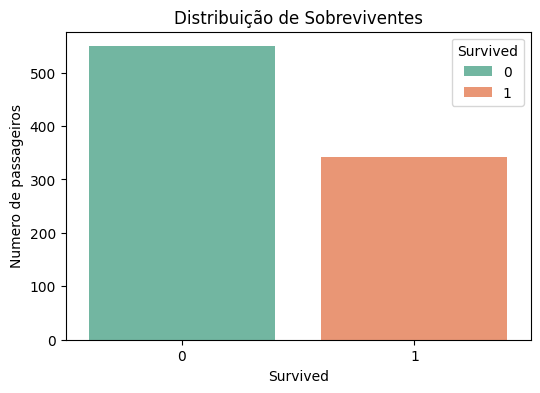

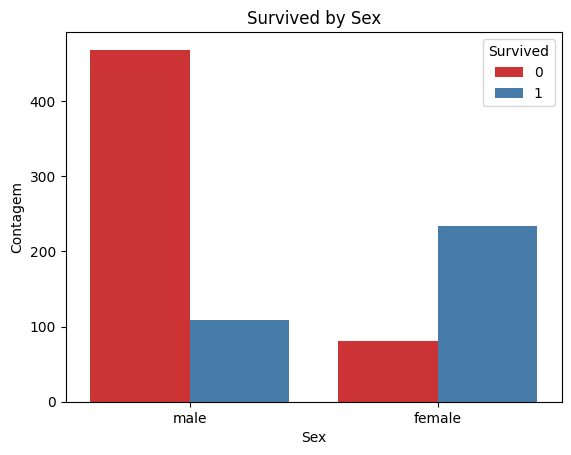

In [4]:
# Configurar o estilo dos gráficos

# 1. Distribuição de Sobreviventes vs Não Sobreviventes
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Survived', data=train, palette='Set2')
plt.title('Distribuição de Sobreviventes')
plt.xlabel('Survived')
plt.ylabel('Numero de passageiros')
plt.show()

# Sobrevivência por Sexo
sns.countplot(x='Sex', hue='Survived', data=train, palette='Set1')
plt.title('Survived by Sex')
plt.xlabel('Sex')
plt.ylabel('Contagem')
plt.show()

In [5]:
print(train.isnull().sum())  # Verifica se há valores ausentes no conjunto de treinamento
train['Age'].fillna(train['Age'].mean())
train['Cabin'].fillna(train['Cabin'].mode()[0])
train['Embarked'].fillna(train['Embarked'].mode()[0])


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [6]:
print(train.info())
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1}) # Converter 'Sex' em variáveis numéricas (0 = female, 1 = male)
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True) # Converter 'Embarked' em variáveis numéricas (usando One-Hot Encoding)

print(train.head())  # data new after transform

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [7]:
# Definir as features (X) e o alvo (y)
X = train.drop(columns=['Survived', 'Name', 'Cabin', 'Ticket'])  # Excluindo colunas irrelevantes
y = train['Survived']  

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

print(f'Tamanho do conjunto de treinamento: {X_train.shape[0]}')
print(f'Tamanho do conjunto de validação: {X_valid.shape[0]}')

modelo_RF = RandomForestClassifier(random_state=42)
modelo_RF.fit(X_train, y_train)

y_pred_RF = modelo_RF.predict(X_valid) # Previsoes

# Avaliação
print("Acurácia Random Forest:", accuracy_score(y_valid, y_pred_RF))
print("\nRelatório de Classificação:\n", classification_report(y_valid, y_pred_RF))


Tamanho do conjunto de treinamento: 712
Tamanho do conjunto de validação: 179
Acurácia Random Forest: 0.8156424581005587

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



Dados TEST

In [8]:
test = pd.read_csv('test.csv')  

print("\nDados de Teste:")
print(test.head())



Dados de Teste:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [9]:
print(test.isnull().sum())  # Verifica se há valores ausentes no conjunto de treinamento
test['Fare'].fillna(test['Fare'].mean()) # Fire tem valores faltantes
#test['Sex'].fillna(test['Sex'].mode()[0]) # Sex tem valores faltantes
test['Age'].fillna(test['Age'].mean()) # Age tem valores faltantes
test['Cabin'].fillna(test['Cabin'].mode()[0]) # Age tem valores faltantes

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


0      B57 B59 B63 B66
1      B57 B59 B63 B66
2      B57 B59 B63 B66
3      B57 B59 B63 B66
4      B57 B59 B63 B66
            ...       
413    B57 B59 B63 B66
414               C105
415    B57 B59 B63 B66
416    B57 B59 B63 B66
417    B57 B59 B63 B66
Name: Cabin, Length: 418, dtype: object

In [10]:
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

print(test.columns)
test=test[X.columns]

# Fazer previsões no conjunto de teste
predictions = modelo_RF.predict(test)


print(predictions[:10])  

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
[0 0 0 0 0 0 1 0 1 0]


In [11]:
importances = modelo_RF.feature_importances_

# Criar um DataFrame para visualizar as importâncias
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
# Ordenar por importância

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df['Percentage'] = (importance_df['Importance'] / importance_df['Importance'].sum()) * 100
print(importance_df)


       Feature  Importance  Percentage
2          Sex    0.265708   26.570765
6         Fare    0.193722   19.372199
0  PassengerId    0.191438   19.143785
3          Age    0.169437   16.943693
1       Pclass    0.079622    7.962182
4        SibSp    0.042096    4.209587
5        Parch    0.028501    2.850109
8   Embarked_S    0.022004    2.200352
7   Embarked_Q    0.007473    0.747329


In [12]:
# Criar um DataFrame com as previsões
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

# Salvar o arquivo de submissão
submission.to_csv('submission.csv', index=False)

print("Arquivo 'submission.csv' criado com as previsões!")


Arquivo 'submission.csv' criado com as previsões!
